In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.options.display.max_columns = None

In [167]:
data = pd.read_csv("spotify-2023.csv", encoding="latin1")
data.iloc[574]

track_name                            Love Grows (Where My Rosemary Goes)
artist(s)_name                                          Edison Lighthouse
artist_count                                                            1
released_year                                                        1970
released_month                                                          1
released_day                                                            1
in_spotify_playlists                                                 2877
in_spotify_charts                                                       0
streams                 BPM110KeyAModeMajorDanceability53Valence75Ener...
in_apple_playlists                                                     16
in_apple_charts                                                         0
in_deezer_playlists                                                    54
in_deezer_charts                                                        0
in_shazam_charts                      

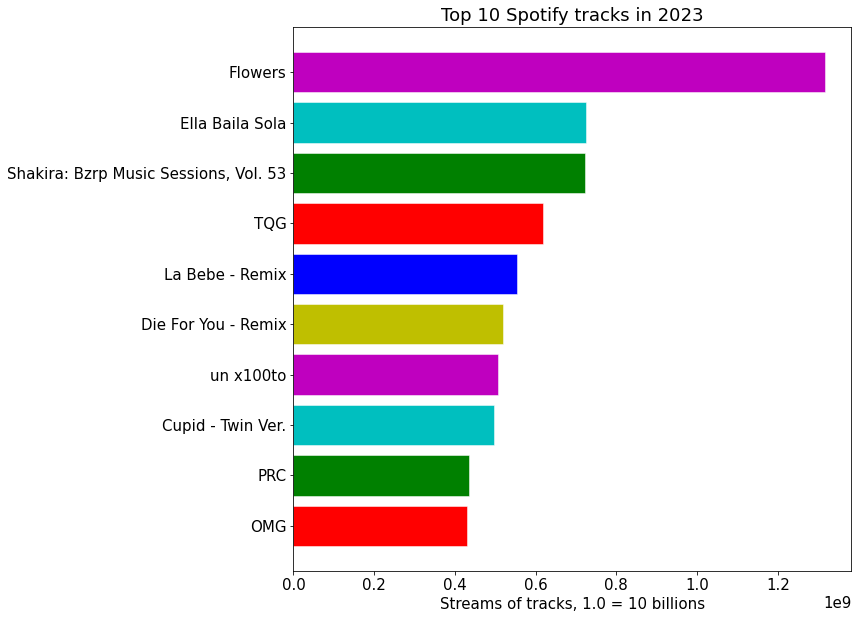

In [187]:
# 1. Завдання полягає в тому, щоб побудувати горизонтальну стовпчикову діаграму, на якій відображаються 10 найпопулярніших пісень на Spotify у 2023 році за кількістю прослуховувань.
#data.drop([574], inplace=True) # Дані streams рядка не можливо конвертувати у float
data["streams"] = pd.to_numeric(data["streams"])
top_2023 = data[data["released_year"] == 2023].sort_values("streams", ascending=False)
top_10_2023 = top_2023[0:10]
top_10_2023

fig, ax = plt.subplots(figsize=(10, 10))
y_pos = np.arange(len(top_10_2023["track_name"]))
labels = tuple(top_10_2023["track_name"])
ax.barh(y_pos, top_10_2023["streams"], align="center", color=["m", "c", "g", "r", "b", "y"], edgecolor="w", linewidth=0.5)
ax.set_yticks(y_pos)
ax.set_yticklabels(labels)
ax.invert_yaxis()
ax.set_xlabel('Streams of tracks, 1.0 = 10 billions')
ax.set_title('Top 10 Spotify tracks in 2023')
plt.rcParams.update({"font.size": 15})
plt.show()

Text(0.5, 1.0, 'Genre distribution of the most popular songs in 2023')

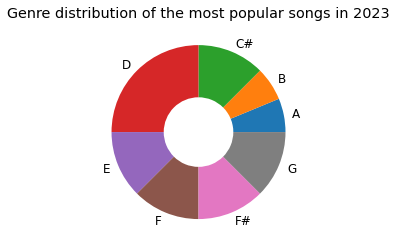

In [169]:
# 2. Розподіл жанрів найпопулярніших пісень: Створіть кругову діаграму або секторну діаграму, яка відображає розподіл жанрів серед найпопулярніших пісень у 2023 році.
size = top_10_2023.groupby(by=[top_10_2023["key"]]).sum()
top_10_2023
size_key = size["artist_count"]
size_labels = list(size.index)

fig, ax = plt.subplots()
plt.pie(size_key, labels = size_labels, wedgeprops=dict(width=0.6))
plt.title("Genre distribution of the most popular songs in 2023")

In [149]:
# 3. Динаміка популярності треку в залежності від часу: Побудуйте лінійний графік, який відображає зміни кількості прослуховувань певного треку протягом року 2023 року.
songs = data.groupby(by=[data["track_name"]]).sum()
dub_data23 = top_2023.duplicated(subset=["track_name"]).sum()
dub_data23
# Кожна пісня має один запис у датасеті на 2023 рік, повтолрних занесень пісень немає, тому визначити динаміку популярності треку неможливо.

0

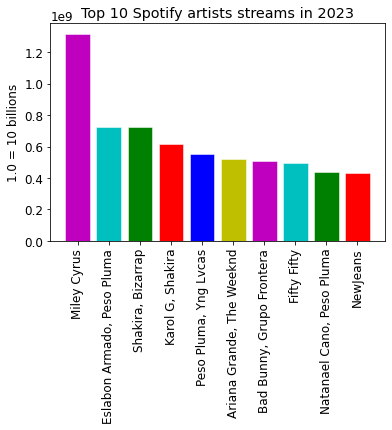

In [194]:
# 4. Рейтинг артистів на Spotify: Створіть стовпчикову діаграму, на якій відображаються 10 найпопулярніших артистів на Spotify у 2023 році за кількістю слухачів.
x = top_10_2023["artist(s)_name"]
y = top_10_2023["streams"]
fig, ax = plt.subplots()
ax.bar(x, y, color=["m", "c", "g", "r", "b", "y"], edgecolor="w", linewidth=0.5)
ax.set_title("Top 10 Spotify artists streams in 2023")
plt.rcParams.update({"font.size": 12})
plt.ylabel("1.0 = 10 billions")
plt.xticks(rotation = 90)
plt.show()

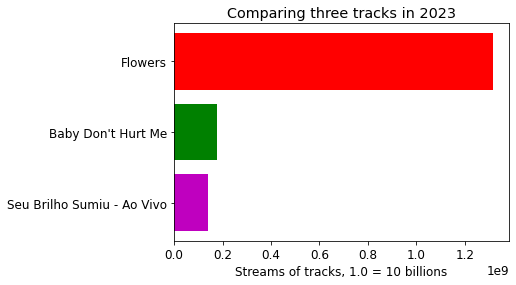

In [166]:
# 5. Порівняння популярності трьох треків: Побудуйте горизонтальну стовпчикову діаграму, яка порівнює кількість прослуховувань трьох конкретних треків у 2023 році.
track_s1 = top_2023.iloc[0, 8]
track_s2 = top_2023.iloc[35, 8]
track_s3 = top_2023.iloc[63, 8]
track_1 = top_2023.iloc[0, 0]
track_2 = top_2023.iloc[35, 0]
track_3 = top_2023.iloc[63, 0]
list_streams = []
list_track = []
list_streams.append(track_s1)
list_streams.append(track_s2)
list_streams.append(track_s3)
list_track.append(track_1)
list_track.append(track_2)
list_track.append(track_3)

fig, ax = plt.subplots()
y_pos = np.arange(len(list_track))
labels = tuple(list_track)
ax.barh(y_pos, list_streams, align="center", color = ["r", "g", "m"])
ax.set_yticks(y_pos)
ax.set_yticklabels(labels)
ax.invert_yaxis()
ax.set_xlabel('Streams of tracks, 1.0 = 10 billions')
ax.set_title('Comparing three tracks in 2023')
plt.rcParams.update({"font.size": 12})